<h1>Exercise 6 </h1>
<h2>Datasets</h2>
Regression Datasets

### 1. Generate a Sample dataset called $ D_1 $:
(a) Initialize matrix $ x \in \mathbb{R}^{100 \times 1} $ using Uniform distribution with $ \mu = 1 $ and $ \sigma = 0.05 $.

(b) Generate target $ y \in \mathbb{R}^{100 \times 1} $ using 
$
y = 1.3x^2 + 4.8x + 8 + \psi,
$
where $ \psi \in \mathbb{R}^{100 \times 1} $ is randomly initialized.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

In [ ]:
# Generate Dataset D1
# Matrix x ∈ R^100x1 using Uniform distribution
np.random.seed(42)  # Set seed for reproducibility
mu = 1  # Mean
sigma = 0.05  # Standard deviation
D1_x = np.random.normal(loc=mu, scale=sigma, size=(100, 1))

# Target y ∈ R^100x1
# Generate ψ as random noise (Gaussian distribution)
psi = np.random.normal(0, 1, size=(100, 1))  # Noise with mean=0 and std=1
D1_y = 1.3 * (D1_x**2) + 4.8 * D1_x + 8 + psi

# Initialize MinMaxScaler for normalization
scaler = StandardScaler()

# Normalize features and target
D1_x = scaler.fit_transform(D1_x)  # Normalize D1_x (NumPy array)
D1_y = scaler.fit_transform(D1_y)  # Normalize D1_y (NumPy array)

D1 = pd.DataFrame(data={'x': D1_x.flatten(), 'y': D1_y.flatten()})

Xtrain_D1, Xtest_D1, Ytrain_D1, Ytest_D1 = train_test_split(D1_x, D1_y, test_size=0.2, random_state=42) # numpy


### 2. Wine Quality dataset called $ D_2 $:
- Use the dataset file `winequality-red.csv` (Wine Quality Dataset).

---

### Instructions:
You are required to pre-process the given datasets.

In [5]:
# Load the Wine Quality Dataset
D2 = pd.read_csv('/Users/antondoluda/Documents/AML/AML_Assignment_3/wine+quality/winequality-red.csv', sep=';')

# Separate features and target
Y_D2 = D2['quality']  # Target variable
X_D2 = D2.drop('quality', axis=1)  # Features

X_D2_normalized = pd.DataFrame(scaler.fit_transform(X_D2), columns=X_D2.columns)  # Normalize features
Y_D2_normalized = pd.DataFrame(scaler.fit_transform(Y_D2.values.reshape(-1, 1)), columns=['quality'])  # Normalize target

# Train-Test Split
Xtrain_D2, Xtest_D2, Ytrain_D2, Ytest_D2 = train_test_split(X_D2_normalized, Y_D2_normalized, test_size=0.2, random_state=42)

<h2>GLMs: Generalized Linear Models with Scikit-Learn (6 Points)</h2>
In previous labs, you have implemented various optimization algorithms to solve linear or logistic regression problems. In this task, you are required to use Scikit-Learn to experiment with the following linear models and Stochastic Gradient Descent (SGD) [Hint: use SGDRegressor]:

1. Ordinary Least Squares 
2. Ridge Regression
3. LASSO

Following are required in this task:
1. Split your data into Train and Test Splits. Use dataset D2.
2. For each model, pick three sets of hyperparameters and learn each model (without crossvalidation). Measure Train and Test RMSE and plot it on one plot. Explain the plots and relate them to the influence of regularized vs. non-regularized models. You have to compare the models and explain underfitting and overfitting.
3. Tune the hyperparameters using GridSearchCV and plot the results of cross-validation for each model. [Hint: use cv results to see different options].
4. Using the optimal hyperparameter, evaluate each model using cross val score. Plot each model using a boxplot and explain the significance of your results.

   model     alpha penalty  train_rmse  test_rmse
0    OLS      None    None    0.807487   0.777936
1  Ridge  0.000001      l2    0.807487   0.777936
2  Ridge    0.0001      l2    0.807488   0.777939
3  Ridge     0.001      l2    0.807499   0.777971
4  Ridge      0.01      l2    0.807624   0.778307
5  LASSO  0.000001      l1    0.807487   0.777936
6  LASSO    0.0001      l1    0.807491   0.777978
7  LASSO     0.001      l1    0.807538   0.778341
8  LASSO      0.01      l1    0.808779   0.780434


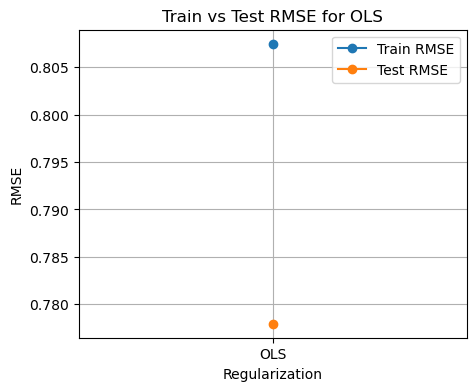

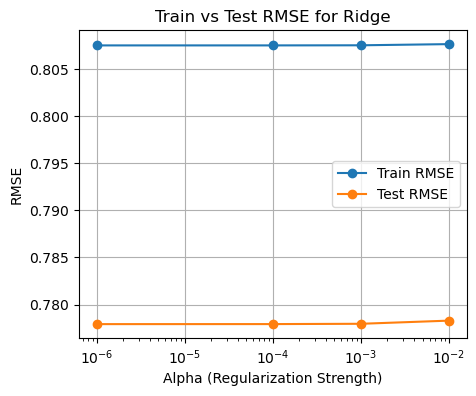

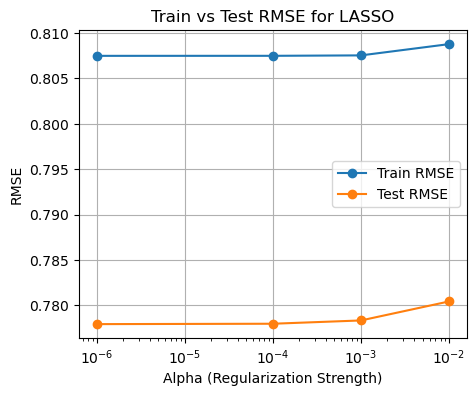

In [6]:
# Train and evaluate models without cross-validation
def train_and_evaluate_no_cv(hyperparameters):
    results = []
    for params in hyperparameters:
        model_name = params['model']
        penalty = params.get('penalty', None)
        alpha = params.get('alpha', 0)  # Default to 0 for OLS (no regularization)
        
        # Initialize SGDRegressor
        model = SGDRegressor(
            penalty=penalty,
            alpha=alpha,
            max_iter=1000,
            tol=1e-3,
            random_state=42
        )
        
        # Train the model
        model.fit(Xtrain_D2, Ytrain_D2.values.ravel())
        
        # Predict and calculate RMSE
        train_rmse = np.sqrt(mean_squared_error(Ytrain_D2, model.predict(Xtrain_D2)))
        test_rmse = np.sqrt(mean_squared_error(Ytest_D2, model.predict(Xtest_D2)))
        
        # Store results
        results.append({
            'model': model_name,
            'alpha': alpha if penalty else 'None',
            'penalty': penalty if penalty else 'None',
            'train_rmse': train_rmse,
            'test_rmse': test_rmse
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    print(results_df)
    return results_df

# Plot the results
def plot_results(results_df):
    # Iterate over each unique model and create a separate plot
    for model in results_df['model'].unique():
        plt.figure(figsize=(5, 4))
        model_results = results_df[results_df['model'] == model]
        
        # Replace 'None' in alpha with 'OLS' (only for OLS model)
        alphas = model_results['alpha'].apply(lambda x: 'OLS' if x == 'None' else x)
        
        # Plot Train and Test RMSE
        plt.plot(alphas, model_results['train_rmse'], label='Train RMSE', marker='o')
        plt.plot(alphas, model_results['test_rmse'], label='Test RMSE', marker='o')

        # Title and labels
        plt.title(f"Train vs Test RMSE for {model}")
        plt.xlabel("Alpha (Regularization Strength)" if model != 'OLS' else "Regularization")
        plt.ylabel("RMSE")
        plt.legend()
        plt.grid()
        
        # Use logarithmic x-scale for Ridge and LASSO
        if model != 'OLS':
            try:
                plt.xscale('log')
            except ValueError:
                pass  # Handle non-numeric values gracefully
        
        plt.show()

# Add alpha=0.001 (from GridSearchCV) to the hyperparameters
hyperparameters = [
    {'model': 'OLS', 'penalty': None, 'alpha': 0},  # No regularization (OLS)
    {'model': 'Ridge', 'penalty': 'l2', 'alpha': 1e-6},
    {'model': 'Ridge', 'penalty': 'l2', 'alpha': 1e-4},
    {'model': 'Ridge', 'penalty': 'l2', 'alpha': 1e-3},  # Add GridSearchCV optimal alpha
    {'model': 'Ridge', 'penalty': 'l2', 'alpha': 1e-2},
    {'model': 'LASSO', 'penalty': 'l1', 'alpha': 1e-6},
    {'model': 'LASSO', 'penalty': 'l1', 'alpha': 1e-4},
    {'model': 'LASSO', 'penalty': 'l1', 'alpha': 1e-3},  # Add GridSearchCV optimal alpha
    {'model': 'LASSO', 'penalty': 'l1', 'alpha': 1e-2},
]

# Train and evaluate models without cross-validation
results_df = train_and_evaluate_no_cv(hyperparameters)

# Plot the results
plot_results(results_df)

<h3>Overfitting:</h3>

Happens when the model learns the training data too well but doesn't perform well on new data.
OLS is at risk of overfitting if the data were noisier or more complex, but here it seems to generalize okay.

<h3>Underfitting:</h3>

Happens when the model is too simple and doesn't capture the patterns in the data.
Ridge and LASSO with high alpha values underfit the data, which is why RMSE goes up.

<h3>Ordinary Least Squares (OLS)</h3>

- The RMSE for the training set (0.807) and the test set (0.778) are  close. The model fits the data without any penalty, as OLS doesn't control the size of the model's coefficients. It tries to fit the data as best as possible, but this can lead to overfitting when the data is noisy or complex.
- Here: The train and test RMSE are close, which means the model is doing a good job overall without overfitting.

<h3>Ridge Regression</h3>

- When the regularization strength (alpha) is very small (like 0.000001), Ridge acts almost like OLS, and the RMSE values are nearly the same.
As alpha increases, the train RMSE goes up slightly, and the test RMSE also increases a little, because Ridge adds a penalty to the model to keep the coefficients small. This helps reduce overfitting by preventing the model from getting too complex. But if the penalty (regularization) is too strong, the model becomes too simple and struggles to learn the patterns in the data, leading to underfitting.
- Here: Small alpha values work well, but higher alpha values (like 0.01) make the model too simple, increasing the RMSE slightly.

LASSO Regression

- Like Ridge, when alpha is small, LASSO behaves like OLS, and the RMSE values are similar.
As alpha increases, the train RMSE rises, and the test RMSE also increases, as LASSO also penalizes the model, but it does so more aggressively. It can even set some features' coefficients to zero, effectively ignoring them. This can help when some features are not important, but if the penalty is too high, the model ignores too much information and underfits.
- Here: LASSO seems to struggle more than Ridge, especially at higher alpha values, where it likely removes too many important features.


Evaluating OLS...
OLS Train RMSE: 0.8075
OLS Test RMSE: 0.7779

Best Parameters for Ridge: {'alpha': 0.001, 'penalty': 'l2'}
Best Cross-Validation RMSE for Ridge: 0.8199


<Figure size 800x600 with 0 Axes>

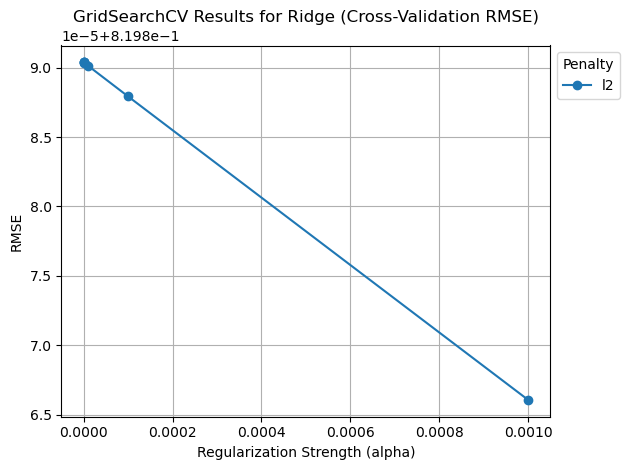


Best Parameters for LASSO: {'alpha': 1e-09, 'penalty': 'l1'}
Best Cross-Validation RMSE for LASSO: 0.8199


<Figure size 800x600 with 0 Axes>

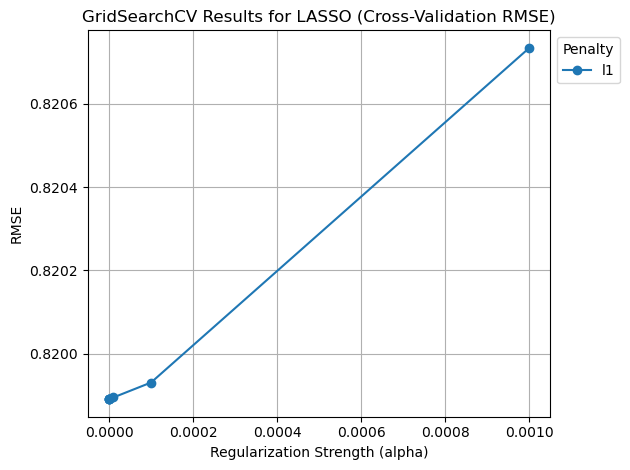


Summary of Best Parameters and RMSE for Each Model:
OLS:
  Best Parameters: {'alpha': 0, 'penalty': None}
  Best RMSE: 0.7779
Ridge:
  Best Parameters: {'alpha': 0.001, 'penalty': 'l2'}
  Best RMSE: 0.8199
LASSO:
  Best Parameters: {'alpha': 1e-09, 'penalty': 'l1'}
  Best RMSE: 0.8199


In [7]:
# Define parameter grids for each model
param_grids = {
    'OLS': {'alpha': [0], 'penalty': [None]},  # No regularization
    'Ridge': {'alpha': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3], 'penalty': ['l2']},
    'LASSO': {'alpha': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3], 'penalty': ['l1']}
}

# Store results for each model
best_params = {}
best_rmse = {}
all_results = {}

# Separate method for plotting results
def plot_results(results, model_name):
    """Plots GridSearchCV results for Ridge and LASSO."""
    pivot_data = results.pivot_table(
        index="param_alpha",
        columns="param_penalty",
        values="mean_test_score",
        aggfunc="mean"
    )

    # Convert negative mean_test_score to RMSE
    pivot_data = np.sqrt(-pivot_data)

    # Plot the results
    plt.figure(figsize=(8, 6))
    pivot_data.plot(marker='o')
    plt.title(f"GridSearchCV Results for {model_name} (Cross-Validation RMSE)")
    plt.xlabel("Regularization Strength (alpha)")
    plt.ylabel("RMSE")
    plt.legend(title="Penalty", loc="upper left", bbox_to_anchor=(1, 1))
    plt.grid()
    plt.tight_layout()
    plt.show()

# Perform GridSearchCV for each model type
for model_name, param_grid in param_grids.items():
    if model_name == 'OLS':
        # Handle OLS separately without GridSearchCV
        print("\nEvaluating OLS...")
        ols_model = SGDRegressor(alpha=0, penalty=None, max_iter=1000, tol=1e-3, random_state=42)
        ols_model.fit(Xtrain_D2, Ytrain_D2.values.ravel())
        ols_train_rmse = np.sqrt(mean_squared_error(Ytrain_D2, ols_model.predict(Xtrain_D2)))
        ols_test_rmse = np.sqrt(mean_squared_error(Ytest_D2, ols_model.predict(Xtest_D2)))

        best_params[model_name] = {'alpha': 0, 'penalty': None}
        best_rmse[model_name] = ols_test_rmse  # Use test RMSE for OLS
        
        print(f"OLS Train RMSE: {ols_train_rmse:.4f}")
        print(f"OLS Test RMSE: {ols_test_rmse:.4f}")
        continue

    # Initialize the SGDRegressor
    sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

    # Perform GridSearchCV
    grid_search = GridSearchCV(
        sgd,
        param_grid,
        cv = 5,
        scoring='neg_mean_squared_error',  # Use negated MSE to align with sklearn scoring convention
        return_train_score=True,
        error_score='raise'
    )
    
    # Fit the model with training data
    grid_search.fit(Xtrain_D2, Ytrain_D2.values.ravel())
    
    # Extract results
    results = pd.DataFrame(grid_search.cv_results_)
    all_results[model_name] = results
    
    # Extract the best parameters and best RMSE
    best_params[model_name] = grid_search.best_params_
    best_rmse[model_name] = np.sqrt(-grid_search.best_score_)
    
    print(f"\nBest Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Cross-Validation RMSE for {model_name}: {np.sqrt(-grid_search.best_score_):.4f}")
    
    # Plot results
    plot_results(results, model_name)

# Summarize the best parameters and RMSE for all models
print("\nSummary of Best Parameters and RMSE for Each Model:")
for model_name in best_params:
    print(f"{model_name}:")
    print(f"  Best Parameters: {best_params[model_name]}")
    print(f"  Best RMSE: {best_rmse[model_name]:.4f}")


In [8]:
# Evaluate the best GridSearchCV model manually
best_model = SGDRegressor(alpha=0, penalty=None, max_iter=1000, tol=1e-3, random_state=42)
best_model.fit(Xtrain_D2, Ytrain_D2.values.ravel())
train_rmse = np.sqrt(mean_squared_error(Ytrain_D2, best_model.predict(Xtrain_D2)))
test_rmse = np.sqrt(mean_squared_error(Ytest_D2, best_model.predict(Xtest_D2)))

print("\nEvaluation of Best Model from GridSearchCV:")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")


Evaluation of Best Model from GridSearchCV:
Train RMSE: 0.8074872476110287
Test RMSE: 0.7779358541147747


The difference arises because GridSearchCV uses 5-fold cross-validation, averaging RMSE across multiple train/validation splits, which captures the model's general performance and variability across different data subsets, often resulting in slightly higher RMSE. The manual evaluation uses a fixed train/test split, and if this split is easier to predict (e.g., less noisy or more representative), it can result in a lower RMSE. Cross-validation is more reliable for model selection as it reflects performance across diverse data splits.

Evaluating OLS with optimal parameters: {'alpha': 0, 'penalty': None}
OLS Cross-Validation RMSE: [0.83900255 0.8637737  0.84267467 0.82942194 0.71626079]
Mean RMSE: 0.8182, Standard Deviation: 0.0522
Evaluating Ridge with optimal parameters: {'alpha': 0.001, 'penalty': 'l2'}
Ridge Cross-Validation RMSE: [0.83896847 0.86375457 0.84263556 0.82937279 0.7162876 ]
Mean RMSE: 0.8182, Standard Deviation: 0.0522
Evaluating LASSO with optimal parameters: {'alpha': 1e-09, 'penalty': 'l1'}
LASSO Cross-Validation RMSE: [0.83900255 0.8637737  0.84267467 0.82942194 0.71626079]
Mean RMSE: 0.8182, Standard Deviation: 0.0522


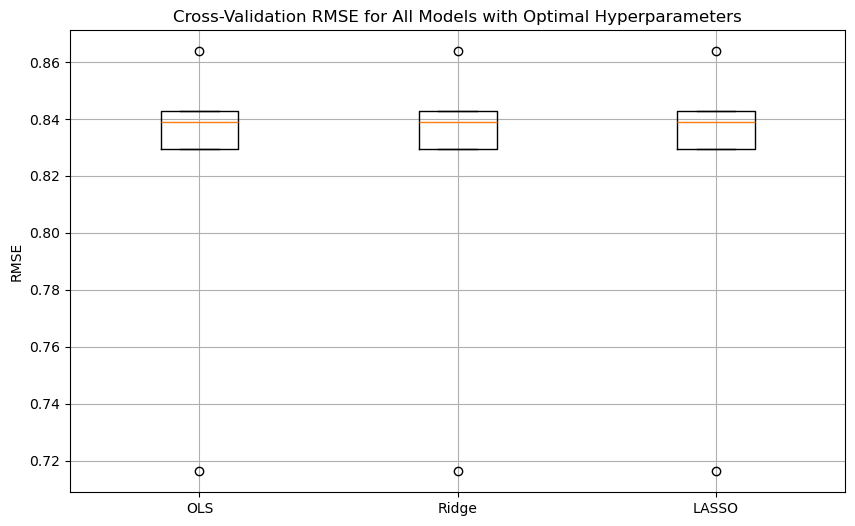

In [9]:
# Optimal parameters for each model
optimal_hyperparameters = {
    'OLS': {'alpha': 0, 'penalty': None},
    'Ridge': {'alpha': 0.001, 'penalty': 'l2'},
    'LASSO': {'alpha': 1e-9, 'penalty': 'l1'}
}

# Store cross-validation results
cv_results = {}

# Perform cross-validation for each model
for model_name, params in optimal_hyperparameters.items():
    print(f"Evaluating {model_name} with optimal parameters: {params}")
    
    # Initialize SGDRegressor with optimal parameters
    model = SGDRegressor(
        alpha=params['alpha'],
        penalty=params['penalty'],
        max_iter=1000,
        tol=1e-3,
        random_state=42
    )
    
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(
        model,
        Xtrain_D2,
        Ytrain_D2.values.ravel(),
        cv=5,
        scoring='neg_mean_squared_error'
    )
    
    # Convert negative scores to RMSE
    cv_rmse = np.sqrt(-cv_scores)
    cv_results[model_name] = cv_rmse  # Store results
    
    # Print RMSE results for this model
    print(f"{model_name} Cross-Validation RMSE: {cv_rmse}")
    print(f"Mean RMSE: {np.mean(cv_rmse):.4f}, Standard Deviation: {np.std(cv_rmse):.4f}")

# Plot results using a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(cv_results.values(), labels=cv_results.keys())
plt.title("Cross-Validation RMSE for All Models with Optimal Hyperparameters")
plt.ylabel("RMSE")
plt.grid()
plt.show()

The median RMSE values are quite similar across all models, suggesting comparable performance. All three models have outliers => variability in their performance across some folds. Despite these outliers, the central tendencies of the models remain competitive and close in performance.

<h2>Polynomial Regression (4 Points)</h2>
In this task, you are required to use dataset D1. So far, we have only looked at 1st-degree polynomials (i.e., linear). In this task, you have to use higher degrees of polynomial features for your data: degrees 1, 2, 7, 10, 16, and 100. [Hint: use sklearn.preprocessing to generate polynomial features].

<h3>Tasks:</h3>

1. Task A: Prediction with High Degree Polynomials
    
    a) For each newly created dataset, learn LinearRegression.
    
    b) Plot prediction curves for each reprocessed data and (y vs x). Describe the phenomena you observe for different prediction curves.

2. Task B: Effect of Regularization
    
    a) Fix the degree of the polynomial to 10.
    
    b) Pick four values of λ (regularization constant) and learn Ridge Regression [Hint: use Ridge and select λ values far apart, e.g., 0, 10−6, 10−21].
    
    c) Plot prediction curves for each reprocessed data and (y vs x). Describe the phenomena observed for different prediction curves.

(-5.0, 35.0)

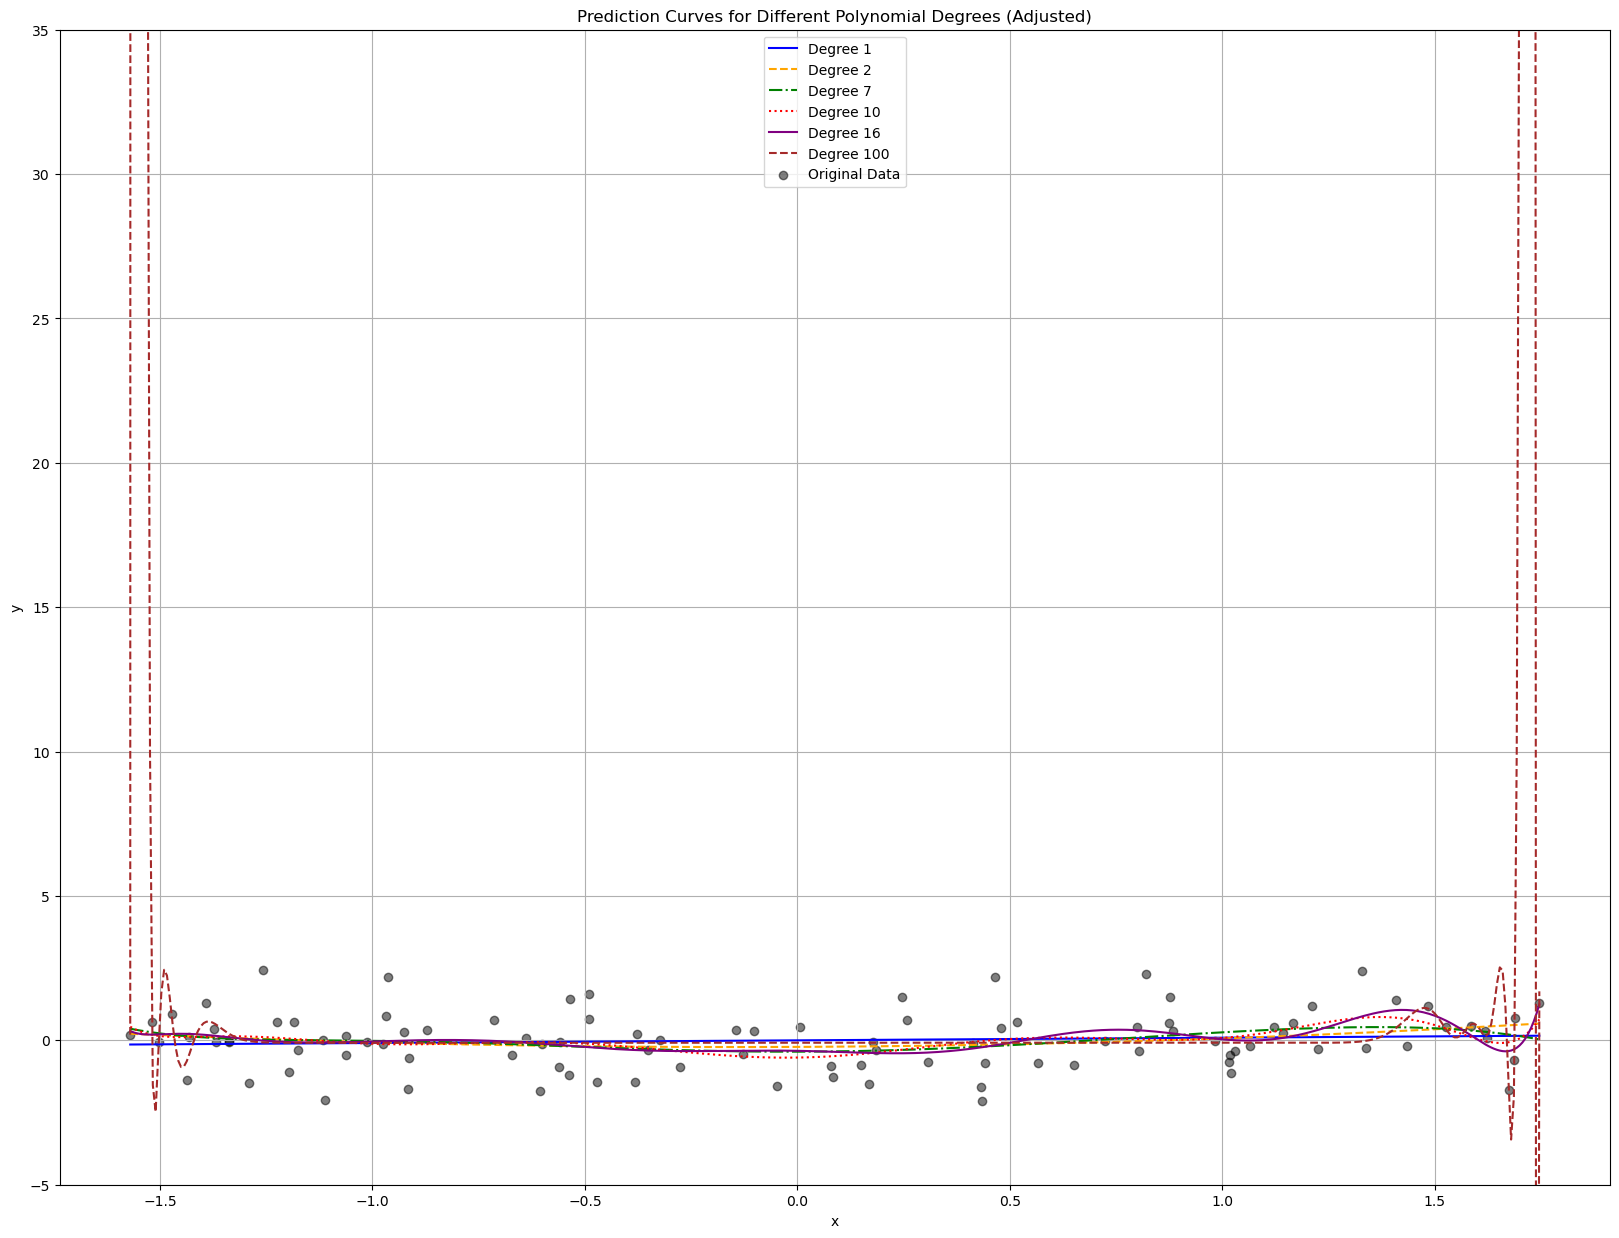

In [10]:
D1_x = D1_x.reshape(-1, 1)

# Task A: High Degree Polynomials
degrees = [1, 2, 7, 10, 16, 100]

plt.figure(figsize=(20, 15))

# Custom colors and line styles
colors = ['b', 'orange', 'green', 'red', 'purple', 'brown']
linestyles = ['-', '--', '-.', ':', '-', '--']

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(D1_x)
    
    model = LinearRegression()
    model.fit(X_poly, D1_y)
    
    # Generate predictions for plotting
    X_plot = np.linspace(min(D1_x), max(D1_x), 500).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)
    
    plt.plot(
        X_plot, y_plot, 
        label=f"Degree {degree}", 
        color=colors[i % len(colors)], 
        linestyle=linestyles[i % len(linestyles)]
    )

# Scatter original data
plt.scatter(D1_x, D1_y, color="black", alpha=0.5, label="Original Data")

# Add plot details
plt.title("Prediction Curves for Different Polynomial Degrees (Adjusted)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.ylim(-5, 35)

Lower-degree polynomials (e.g., degrees 1 and 2) exhibit underfitting as they fail to capture the complexity of the data, resulting in overly simplistic models. As the degree increases (e.g., degree 7), the model better captures the data trends, but higher degrees (10, 16, 100) lead to overfitting, with extreme oscillations and sensitivity to noise, particularly near the boundaries. This highlights the trade-off between bias and variance, where overly complex models fail to generalize well.

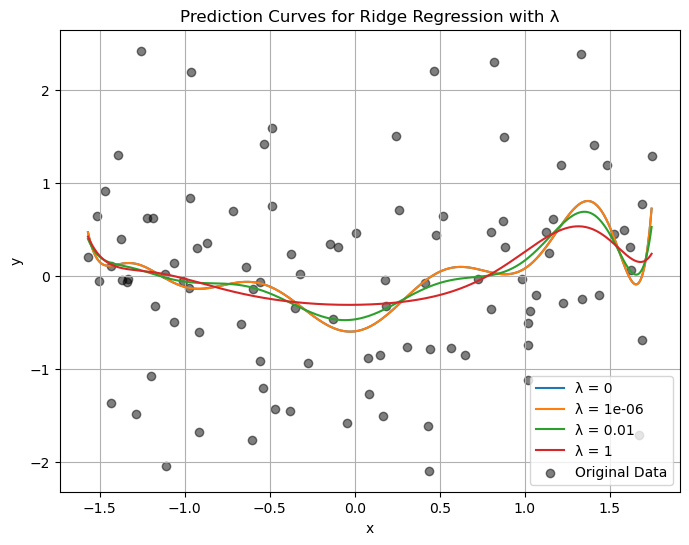

In [11]:
# Task B: Effect of Regularization
degree = 10
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(D1_x)

lambdas = [0, 1e-6, 1e-2, 1]

plt.figure(figsize=(8, 6))

for lam in lambdas:
    model = Ridge(alpha=lam)
    model.fit(X_poly, D1_y)
    
    # Generate predictions for plotting
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)
    
    plt.plot(X_plot, y_plot, label=f"λ = {lam}")

plt.scatter(D1_x, D1_y, color="black", alpha=0.5, label="Original Data")
plt.title("Prediction Curves for Ridge Regression with λ")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

As $\lambda$ increases, Ridge Regression smoothens the prediction curve, reducing overfitting by penalizing large coefficients. With $\lambda = 0$, the model overfits, showing sharp oscillations, while higher values like $\lambda = 1$ produce a much smoother curve that generalizes better but may underfit slightly. This illustrates the trade-off between flexibility and regularization in controlling model complexity.